In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [55]:
df= pd.read_csv("Netflix Userbase.csv")

In [56]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [57]:
df[['Age','Monthly Revenue']].describe()

,Age,Monthly Revenue
count,2500.000000,2500.000000
mean,38.795600,12.508400
std,7.171778,1.686851
min,26.000000,10.000000
25%,32.000000,11.000000
50%,39.000000,12.000000
75%,45.000000,14.000000
max,51.000000,15.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [59]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [60]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [61]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

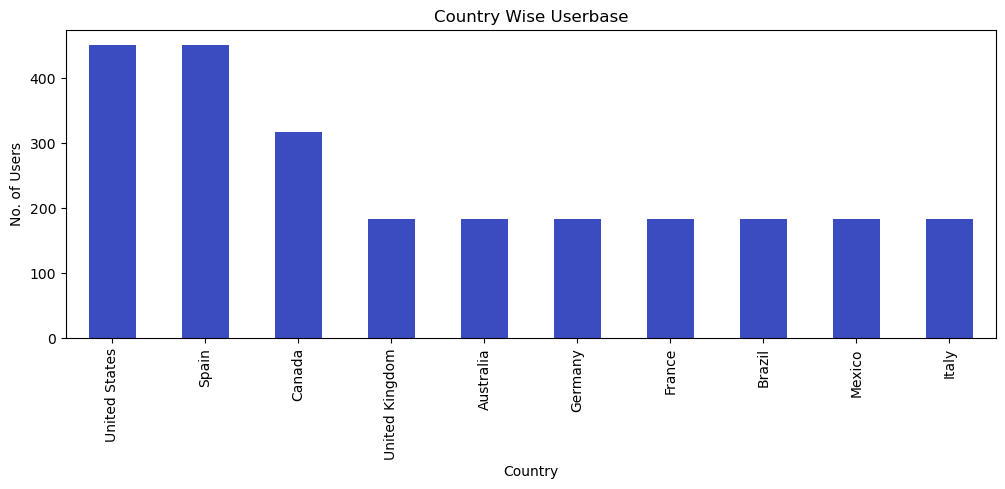

In [65]:
plt.figure(figsize=(12,4))
df['Country'].value_counts().plot(kind='bar',cmap='coolwarm')
plt.title('Country Wise Userbase')
plt.xlabel('Country')
plt.ylabel('No. of Users')
plt.show()

United States and Spain have the largest user base followed by Canada and United Kingdom

In [66]:
df['Gender'].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

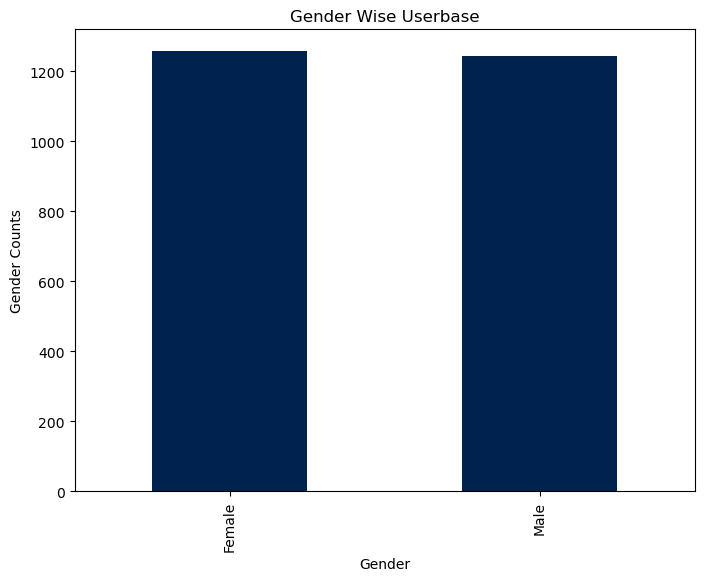

In [67]:
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot(kind='bar',cmap='cividis')
plt.title('Gender Wise Userbase')
plt.xlabel('Gender')
plt.ylabel('Gender Counts')
plt.show()

The relatively even split between male and female users suggests that Netflix's content and user interface appeal
similarly to both demographics. This balance could be a crucial element in the platform’s approach to maintaining 
user loyalty and retention.

In [70]:
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

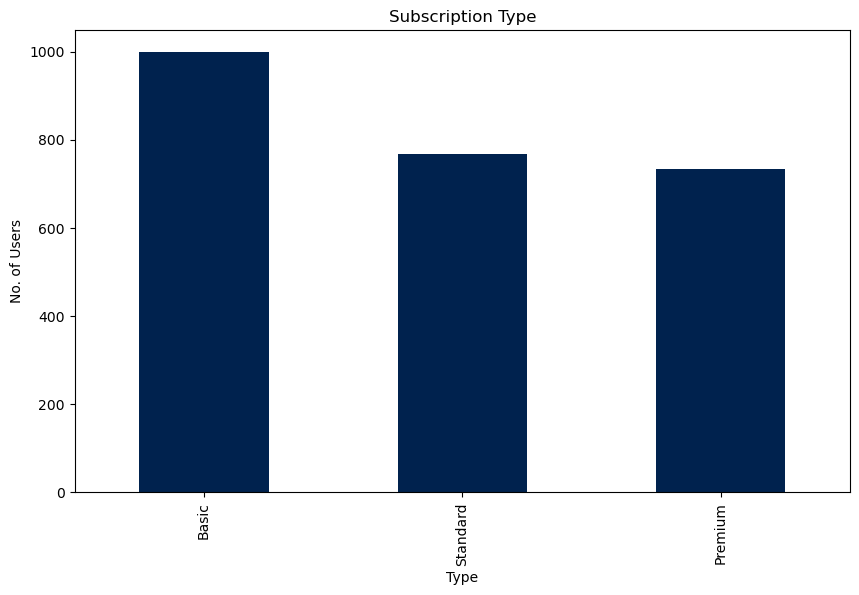

In [27]:
plt.figure(figsize=(10,6))
df['Subscription Type'].value_counts().plot(kind='bar',cmap='cividis')
plt.title('Subscription Type')
plt.xlabel('Type')
plt.ylabel('No. of Users')
plt.show()

The popularity of the Basic subscription plan suggests that a significant portion of users prioritize affordability, while the Standard and Premium plans attract users seeking enhanced features like higher video quality and multiple screens

In [71]:
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

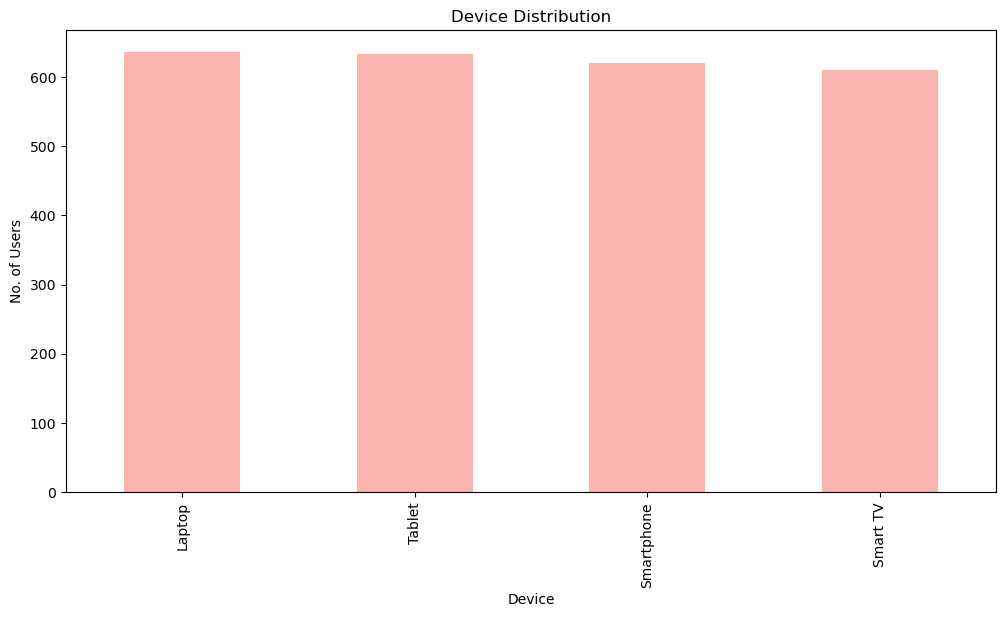

In [28]:
plt.figure(figsize=(12,6))
df['Device'].value_counts().plot(kind='bar',cmap='Pastel1')
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('No. of Users')
plt.show()

The similar distribution of users across different devices (such as smartphones, tablets, and TVs) highlights Netflix’s effectiveness in delivering a seamless viewing experience across various platforms.
This versatility likely plays a role in the platform's widespread adoption and user retention.

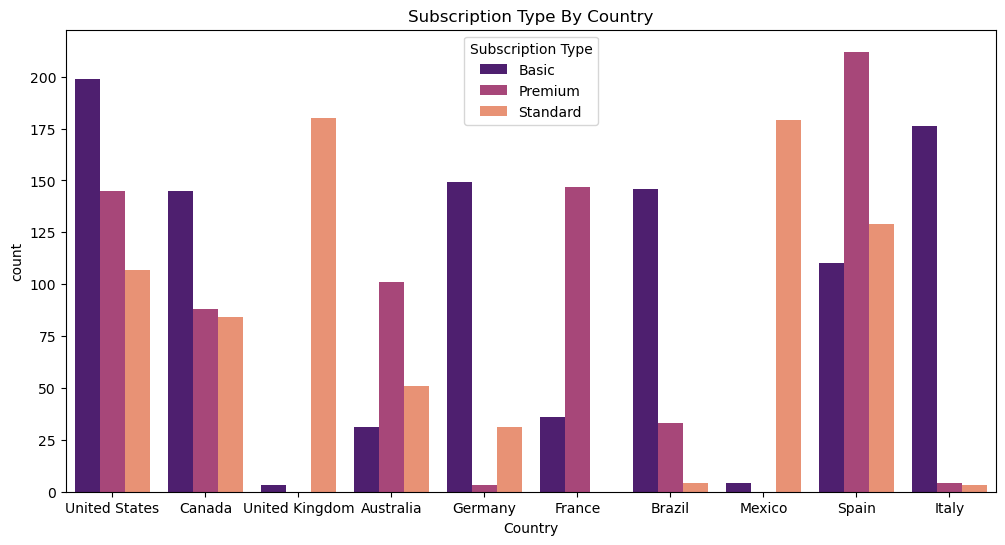

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country',hue='Subscription Type',data=df,palette='magma')
plt.title("Subscription Type By Country")
plt.show()


Surprisingly, both Spain and France have a higher number of premium users compared to standard and basic subscriptions, while Italy shows a clear preference for the basic subscription by a significant margin

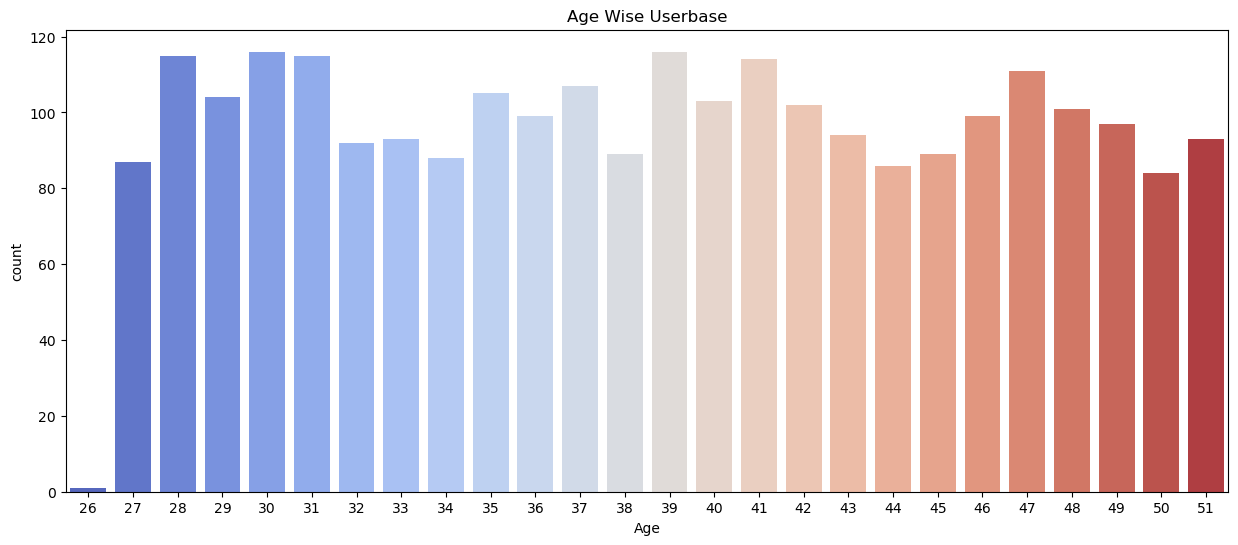

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data=df,palette='coolwarm')
plt.title('Age Wise Userbase')
plt.show()

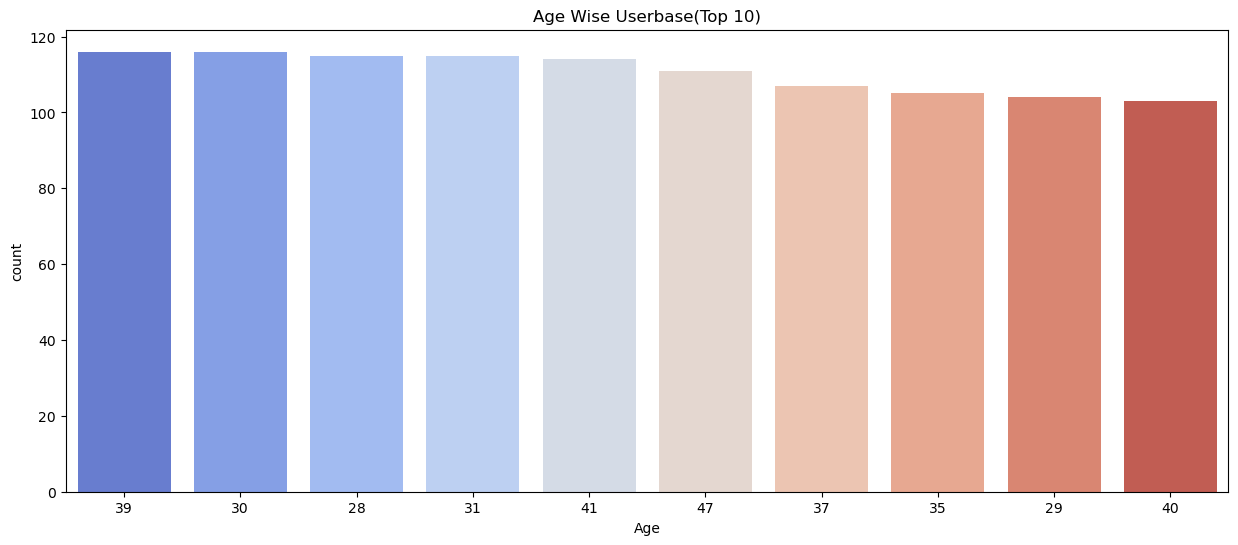

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data=df,palette='coolwarm',order=df['Age'].value_counts().index[:10])
plt.title('Age Wise Userbase(Top 10)')
plt.show()

In [34]:
subs_by_country = df.pivot_table(index='Country',columns='Subscription Type',values='User ID',aggfunc='count',fill_value=0)
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


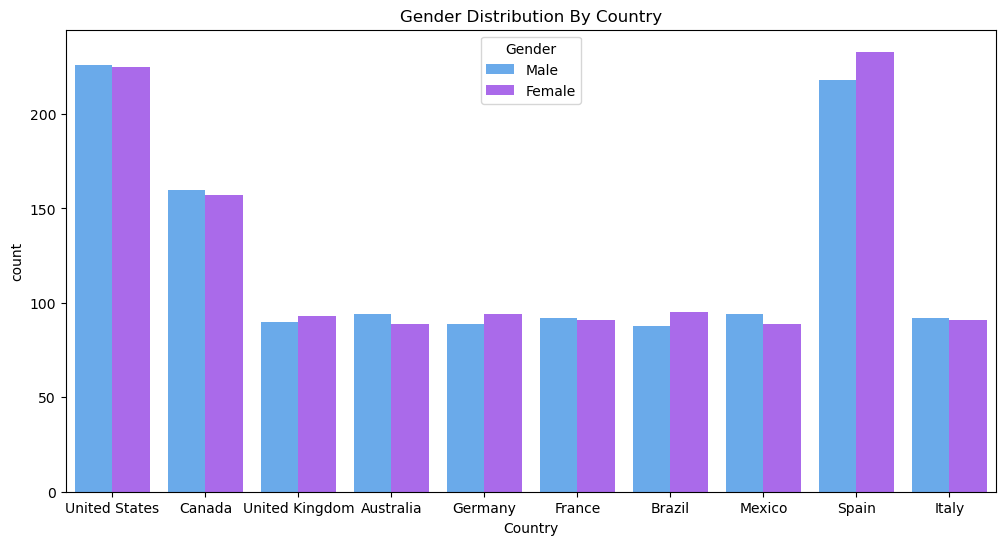

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country',hue='Gender',data=df,palette='cool')
plt.title("Gender Distribution By Country")
plt.show()

In [36]:
subs_by_country = df.pivot_table(index='Country',columns='Gender',values='User ID',aggfunc='count',fill_value=0)
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Gender,Female,Male,Total
Country,,,
Australia,89,94,183
Brazil,95,88,183
Canada,157,160,317
France,91,92,183
Germany,94,89,183
Italy,91,92,183
Mexico,89,94,183
Spain,233,218,451
United Kingdom,93,90,183


In [37]:
subs_by_country = df.pivot_table(index='Country',columns=['Gender','Subscription Type'],values='User ID',aggfunc='count',fill_value=0)
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Gender            Female                   Male                  Total
Subscription Type  Basic Premium Standard Basic Premium Standard      
Country                                                               
Australia             16      45       28    15      56       23   183
Brazil                78      16        1    68      17        3   183
Canada                68      40       49    77      48       35   317
France                17      74        0    19      73        0   183
Germany               80       1       13    69       2       18   183
Italy                 86       3        2    90       1        1   183
Mexico                 2       0       87     2       0       92   183
Spain                 60     113       60    50      99       69   451
United Kingdom         2       0       91     1       0       89   183
United States        103      72       50    96      73       57   451

In [38]:
subs_by_country = df.pivot_table(index=['Country','Gender'],columns='Subscription Type',values='User ID',aggfunc='count',fill_value=0)
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Subscription Type      Basic  Premium  Standard  Total
Country        Gender                                 
Australia      Female     16       45        28     89
               Male       15       56        23     94
Brazil         Female     78       16         1     95
               Male       68       17         3     88
Canada         Female     68       40        49    157
               Male       77       48        35    160
France         Female     17       74         0     91
               Male       19       73         0     92
Germany        Female     80        1        13     94
               Male       69        2        18     89
Italy          Female     86        3         2     91
               Male       90        1         1     92
Mexico         Female      2        0        87     89
               Male        2        0        92     94
Spain          Female     60      113        60    233
               Male       50       99        69    218
United Kingdom Female      2        0        91     93
               Male        1        0        89     90
United States  Female    103       72        50    225
               Male       96       73        57    226

In [40]:
df['Join Date'] = pd.to_datetime(df['Join Date'],format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'],format='%d-%m-%y')

In [41]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [42]:
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x/30))

In [43]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2


In [44]:
average_duration = round(df['Duration Months'].mean(),2)
print(f"Average Duration: {average_duration}")

Average Duration: 10.78


With users staying subscribed for an average of 10-11 months, Netflix enjoys strong customer loyalty, suggesting satisfaction with the content and service provided.

In [45]:
df['LifeTimeValue'] = df['Duration Months'] * df['Monthly Revenue']

In [46]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LifeTimeValue
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


In [47]:
ltv_per_country = df.groupby('Country')['LifeTimeValue'].sum().sort_values(ascending=False)
ltv_per_country

Country
United States     60445
Spain             59269
Canada            43116
France            26080
United Kingdom    25990
Australia         25021
Brazil            24980
Germany           24349
Mexico            24228
Italy             23618
Name: LifeTimeValue, dtype: int64

USA, Spain, Cananda are top 3 revenue generator for Netflix

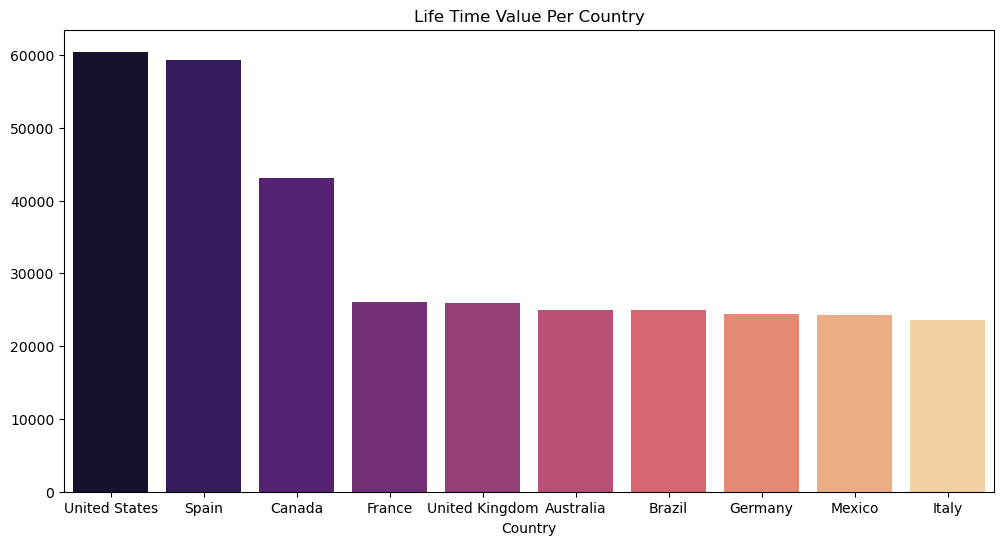

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x=ltv_per_country.index,y=ltv_per_country.values,palette='magma')
plt.title('Life Time Value Per Country')
plt.show()

In [49]:
ltv_per_country_mean = df.groupby('Country')['LifeTimeValue'].mean().sort_values(ascending=False)
round(ltv_per_country_mean,2)

Country
France            142.51
United Kingdom    142.02
Australia         136.73
Brazil            136.50
Canada            136.01
United States     134.02
Germany           133.05
Mexico            132.39
Spain             131.42
Italy             129.06
Name: LifeTimeValue, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

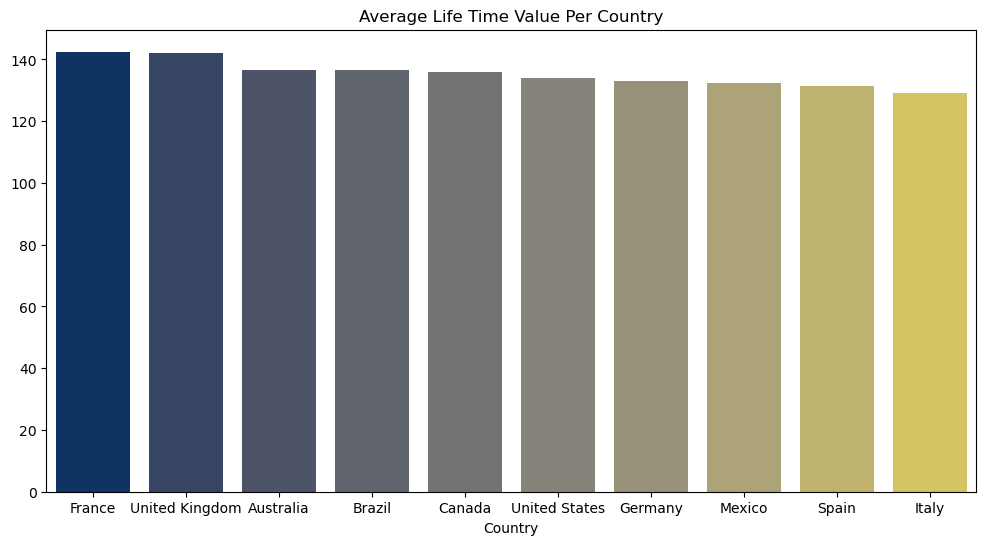

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=ltv_per_country_mean.index,y=ltv_per_country_mean.values,palette='cividis')
plt.title('Average Life Time Value Per Country')
plt.show

In [51]:
revenue_by_device = df.groupby('Device')['LifeTimeValue'].sum().sort_values(ascending=False)
revenue_by_device

Device
Tablet        86604
Laptop        85251
Smartphone    83826
Smart TV      81415
Name: LifeTimeValue, dtype: int64

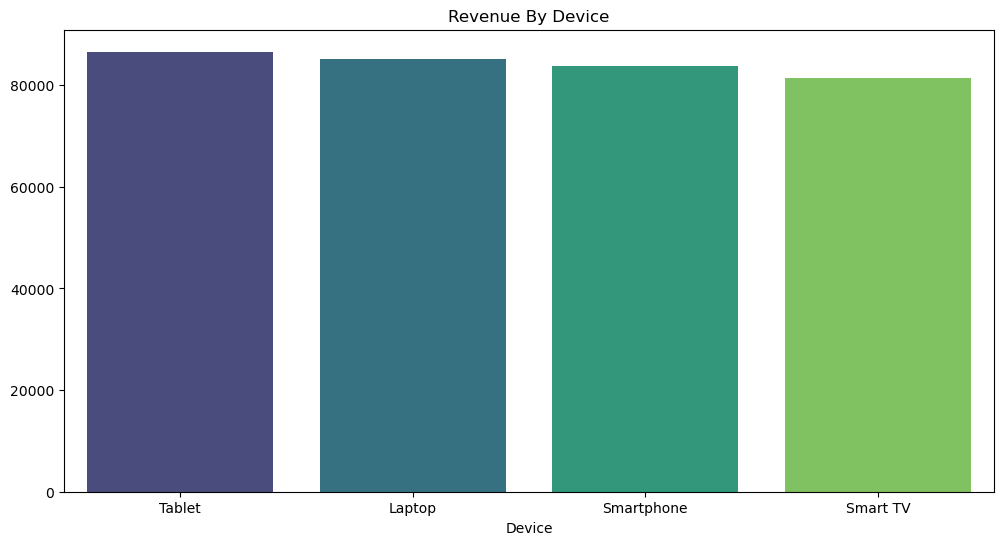

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_device.index,y=revenue_by_device.values,palette='viridis')
plt.title('Revenue By Device')
plt.show()

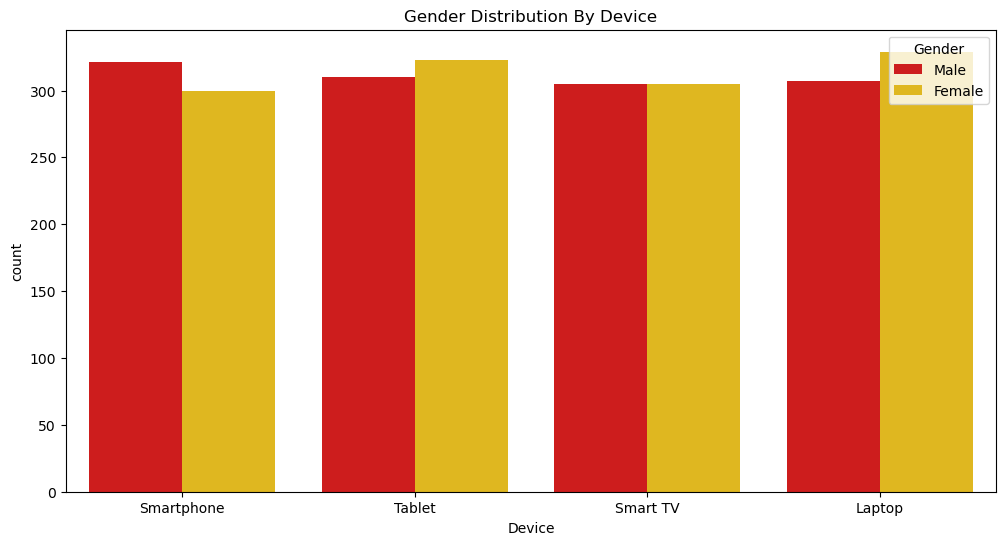

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='Device',hue='Gender',data=df,palette='hot')
plt.title('Gender Distribution By Device')
plt.show()